## 3. Data Preparation


In [17]:

df1.drop(['employment_occupation', 
                 'employment_industry',
                 'h1n1_vaccine',
                 'health_insurance',
                 'respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
                 'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc'], axis=1, inplace=True)

* We decided to drop columns related to **H1N1_Vaccine** since our focus is on the **Seasonal_Vaccine**
* We dropped `employment_occupation`,`employment_industry`,`health_insurance` since they have over 40% of missing values


In [18]:
# feature enginering for behavioral columns
behavioral_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                   'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']
df1['behavioral_sum'] = df1[behavioral_cols].sum(axis=1)
df1.drop(behavioral_cols, axis=1, inplace=True)
df1.columns


Index(['doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'seasonal_vaccine', 'behavioral_sum'],
      dtype='object')

In [19]:
# checking for our new df1 columns
df1.columns

Index(['doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'seasonal_vaccine', 'behavioral_sum'],
      dtype='object')

In [20]:
# checking for datatypes of our new df1
df1.dtypes

doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status               object
hhs_geo_region                  object
census_msa                      object
household_adults               float64
household_children             float64
seasonal_vaccine                 int64
behavioral_sum                 float64
dtype: object

In [21]:
# Get distribution summary with missing value info
dist_summary = pd.DataFrame({
    'dtype': df1.dtypes,
    'non_null_count': df1.count(),
    'null_count': df1.isnull().sum(),
    'null_percentage': (df1.isnull().sum() / len(df1)) * 100,
    'unique_values': df1.nunique()
})

# Add basic statistics
dist_summary = dist_summary.join(df1.describe().T)
dist_summary

,dtype,non_null_count,null_count,null_percentage,unique_values,count,mean,std,min,25%,50%,75%,max
doctor_recc_seasonal,float64,24547,2160,8.087767,2,24547.0,0.329735,0.470126,0.0,0.0,0.0,1.0,1.0
chronic_med_condition,float64,25736,971,3.635751,2,25736.0,0.283261,0.450591,0.0,0.0,0.0,1.0,1.0
child_under_6_months,float64,25887,820,3.070356,2,25887.0,0.082590,0.275266,0.0,0.0,0.0,0.0,1.0
health_worker,float64,25903,804,3.010447,2,25903.0,0.111918,0.315271,0.0,0.0,0.0,0.0,1.0
opinion_seas_vacc_effective,float64,26245,462,1.729884,5,26245.0,4.025986,1.086565,1.0,4.0,4.0,5.0,5.0
opinion_seas_risk,float64,26193,514,1.924589,5,26193.0,2.719162,1.385055,1.0,2.0,2.0,4.0,5.0
opinion_seas_sick_from_vacc,float64,26170,537,2.010709,5,26170.0,2.118112,1.332950,1.0,1.0,2.0,4.0,5.0
age_group,object,26707,0,0.000000,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,object,25300,1407,5.268282,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,object,26707,0,0.000000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# creating list variable for categorical and numerical columns
binary_categorical_cols = [col for col in df1.columns 
               if df1[col].dropna().nunique() == 2]

print("Binary categorical columns:")
print(binary_categorical_cols)

Binary categorical columns:
['doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'sex', 'marital_status', 'rent_or_own', 'seasonal_vaccine']


In [23]:
# imputing all Binary categorical columns with mode
for col in binary_categorical_cols:
    mode_value = df1[col].mode()[0]
    df1[col].fillna(mode_value, inplace=True)
df1.isnull().sum()


C:\Users\Latifa Riziki\AppData\Local\Temp\ipykernel_26644\1454500913.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(mode_value, inplace=True)
C:\Users\Latifa Riziki\AppData\Local\Temp\ipykernel_26644\1454500913.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                    0
rent_or_own                       0
employment_status              1463
hhs_geo_region                    0
census_msa                        0
household_adults                249
household_children              249
seasonal_vaccine                  0
behavioral_sum                    0
dtype: int64

In [24]:
# checking for categorical columns with more than 2 categories classes
multi_categorical_cols = [col for col in df1.columns 
               if df1[col].dropna().nunique() > 2]

print("multi_categorical_cols:")
print(multi_categorical_cols)

multi_categorical_cols:
['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'income_poverty', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'behavioral_sum']


In [25]:
# creating a variable of categorical columns with more than 2 categories
ordinal_cols = [
    
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc",
    
    "age_group",
    "employment_status",
    "education",
    "income_poverty",
    "household_adults",
    "household_children"
]


In [26]:
# labelcategorical columns with string values
# Age Order
age_order = {
    "18 - 34 Years": 0,
    "35 - 44 Years": 1,
    "45 - 54 Years": 2,
    "55 - 64 Years": 3,
    "65+ Years": 4
}

df1["age_group"] = df1["age_group"].map(age_order)

# Eduction Order 
edu_order = {
    "< 12 Years": 0,
    "12 Years": 1,
    "Some College": 2,
    "College Graduate": 3
}
df1["education"] = df1["education"].map(edu_order)

# income poverty 
income_order = {
    "Below Poverty": 0,
    "<= $75,000, Above Poverty": 1,
    "> $75,000": 2
}



df1["income_poverty"] = df1["income_poverty"].map(income_order)
# employment status
employment_status={
    "Employed": 0,
    "Unemployed": 1,
    "Not in Labor Force": 2
    
}
df1["employment_status"] = df1["employment_status"].map(employment_status)

* age_group, education, income_poverty, employment status will be labeling them like 1,2,3,4.. since they have an order

In [27]:
# imputing ordinal columns with median
for col in ordinal_cols:
    median_value = df1[col].median()
    df1[col].fillna(median_value, inplace=True)
df1.isnull().sum()

C:\Users\Latifa Riziki\AppData\Local\Temp\ipykernel_26644\689020247.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(median_value, inplace=True)


doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
seasonal_vaccine               0
behavioral_sum                 0
dtype: int64

In [28]:
# printing the first 5 rows of our df1 columns
df1.head()

,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine,behavioral_sum
0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,3,0.0,White,...,0.0,Not Married,Own,2.0,oxchjgsf,Non-MSA,0.0,0.0,0,2.0
1,0.0,0.0,0.0,0.0,4.0,2.0,4.0,1,1.0,White,...,0.0,Not Married,Rent,0.0,bhuqouqj,"MSA, Not Principle City",0.0,0.0,1,4.0
2,0.0,1.0,0.0,0.0,4.0,1.0,2.0,0,3.0,White,...,1.0,Not Married,Own,0.0,qufhixun,"MSA, Not Principle City",2.0,0.0,0,1.0
3,1.0,1.0,0.0,0.0,5.0,4.0,1.0,4,1.0,White,...,0.0,Not Married,Rent,2.0,lrircsnp,"MSA, Principle City",0.0,0.0,1,3.0
4,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2,2.0,White,...,1.0,Married,Own,0.0,qufhixun,"MSA, Not Principle City",1.0,0.0,0,4.0


In [29]:
# dropping hhs_geo_region since it has random values which do not make sense to us
df1.drop('hhs_geo_region', axis=1, inplace=True)


In [30]:
# one hot encoding for nominal categorical columns
nominal_cols = [
    "race",
    "census_msa",
    "sex",
    "marital_status",
    "rent_or_own",
    
]

data = pd.get_dummies(df1, columns=nominal_cols, drop_first=True, dtype=int)

In [31]:
# Checking the first 5 rows of our new dataframe after encoding 
data.head()

,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,income_poverty,...,seasonal_vaccine,behavioral_sum,race_Hispanic,race_Other or Multiple,race_White,"census_msa_MSA, Principle City",census_msa_Non-MSA,sex_Male,marital_status_Not Married,rent_or_own_Rent
0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,3,0.0,0.0,...,0,2.0,0,0,1,0,1,0,1,0
1,0.0,0.0,0.0,0.0,4.0,2.0,4.0,1,1.0,0.0,...,1,4.0,0,0,1,0,0,1,1,1
2,0.0,1.0,0.0,0.0,4.0,1.0,2.0,0,3.0,1.0,...,0,1.0,0,0,1,0,0,1,1,0
3,1.0,1.0,0.0,0.0,5.0,4.0,1.0,4,1.0,0.0,...,1,3.0,0,0,1,1,0,0,1,1
4,0.0,0.0,0.0,0.0,3.0,1.0,4.0,2,2.0,1.0,...,0,4.0,0,0,1,0,0,0,0,0


In [32]:
# check the distribution of value counts
data['seasonal_vaccine'].value_counts()

seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

In [33]:
# checking corerelation of all features with target variable 'seasonal_vaccine'
correlation = data.corr()['seasonal_vaccine'].sort_values(ascending=False)
correlation

seasonal_vaccine                  1.000000
opinion_seas_risk                 0.386916
doctor_recc_seasonal              0.360696
opinion_seas_vacc_effective       0.358869
age_group                         0.277454
chronic_med_condition             0.169465
employment_status                 0.129689
health_worker                     0.126977
behavioral_sum                    0.125734
race_White                        0.100314
education                         0.066918
income_poverty                    0.063805
child_under_6_months              0.013424
census_msa_Non-MSA               -0.009042
census_msa_MSA, Principle City   -0.015406
race_Other or Multiple           -0.023186
marital_status_Not Married       -0.042360
opinion_seas_sick_from_vacc      -0.060538
household_adults                 -0.065137
race_Hispanic                    -0.066995
sex_Male                         -0.077091
rent_or_own_Rent                 -0.101796
household_children               -0.111680
Name: seaso

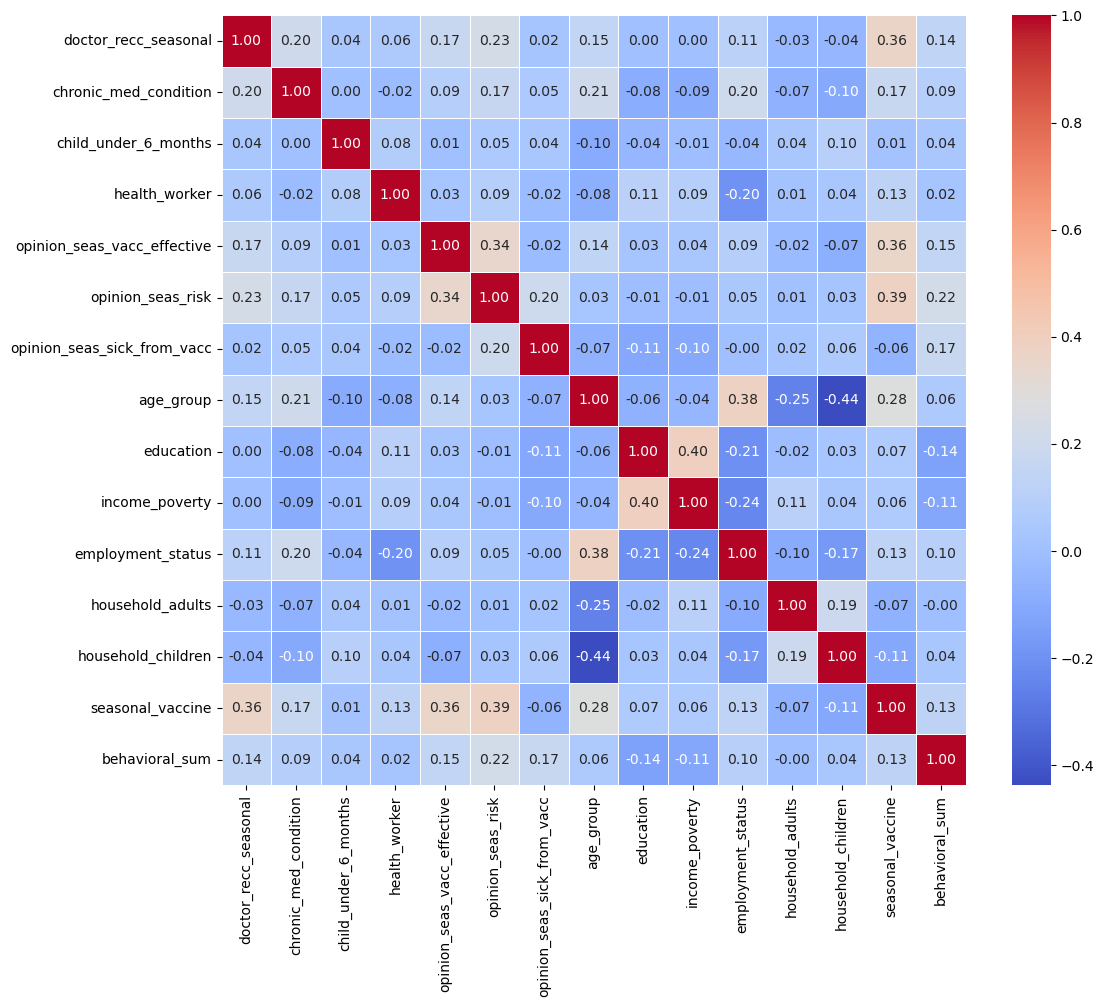

In [34]:
# ploting heatmap to show the relationship of our features and target variable
df1_corr = df1.select_dtypes(include = 'number')
plt.figure(figsize=(12, 10))
sns.heatmap(df1_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()


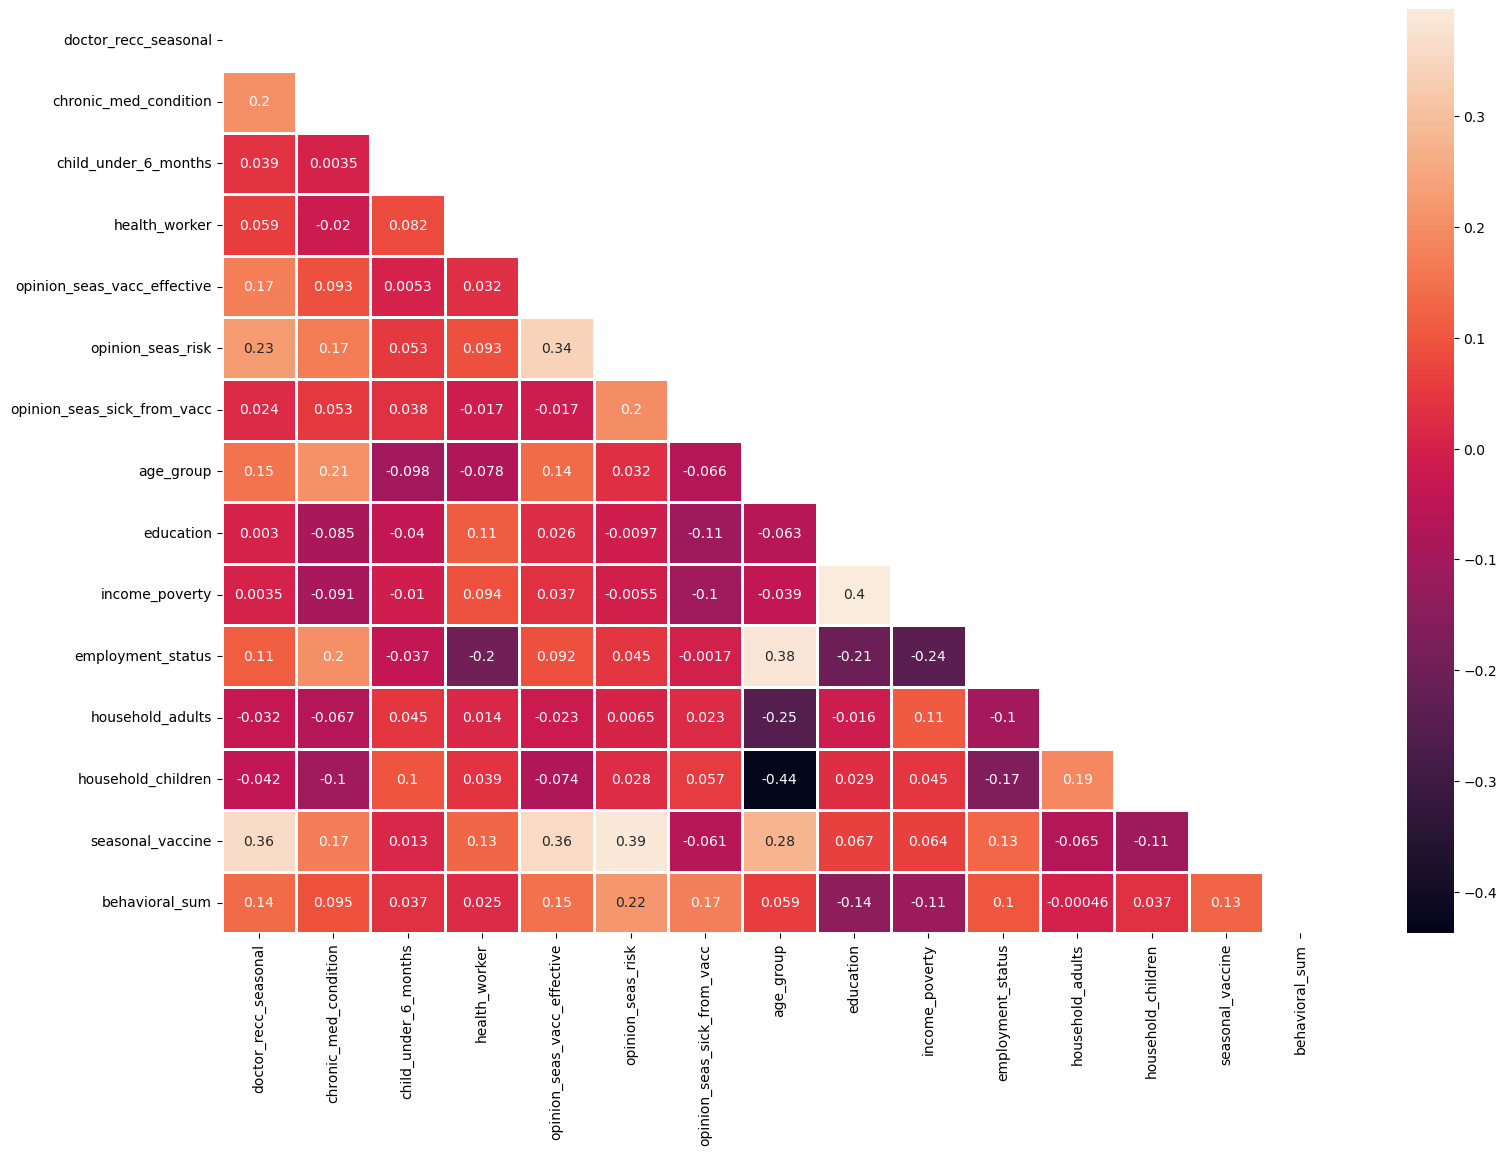

In [35]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df1_corr.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()